<a href="https://colab.research.google.com/github/hbeck118/GIS/blob/main/Berlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas==1.0.1

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:
#!python --version
gpd.__version__

'1.0.1'

In [4]:
!pip install mapclassify
import mapclassify #need for thematic map classification

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 1.5 MB/s eta 0:00:00


In [5]:
#Shapefile of Berlin from https://hub.arcgis.com/datasets/esri-de-content::bezirke-berlin/about
! wget -q -O berlin.zip https://docs.google.com/uc?id=1N7YjXUVVv1-a5G69lQ4ioxMwcDvgCn3t&export=download

zip_ref = zipfile.ZipFile('berlin.zip', 'r'); zip_ref.extractall(); zip_ref.close()
ber0=gpd.read_file('Berlin_Bezirke.shp')

<Axes: >

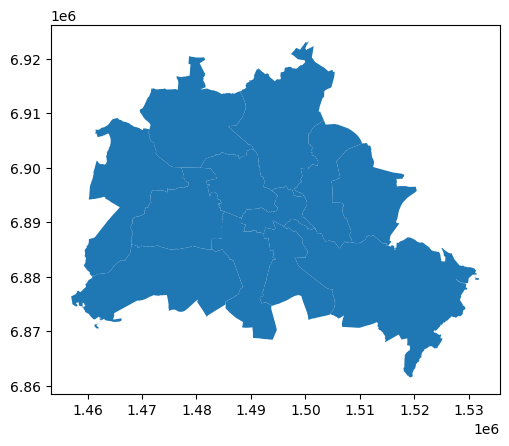

In [6]:
ber0.plot()

In [7]:
#importing data on foreign born population in Berlin from https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/
berfb=pd.read_excel('https://docs.google.com/uc?id=1UIpvSj5-CwQHJVkxhfSCEDBlJdvHPGw_&export=download')

In [8]:
#importing data on berlin total population from https://de.statista.com/statistik/daten/studie/1109841/umfrage/einwohnerzahl-bezirke-berlin/
berpop=pd.read_excel('https://docs.google.com/uc?id=1tlVbOworGPcjJCKMP7UK_3y9S_KKHRiX&export=download')

In [9]:
berfb.head(2)

,Bezirk,Ausländer
0,Mitte,148409
1,Neukölln,93045


In [ ]:
berpop.head(2)

,Bezirk,Einwohnerzahl
0,Pankow,424307
1,Mitte,397134


In [10]:
merged_berpop = pd.merge(berfb, berpop, on='Bezirk')

In [ ]:
merged_berpop.head(2)

,Bezirk,Ausländer,Einwohnerzahl
0,Mitte,148409,397134
1,Neukölln,93045,330017


In [11]:
merged_berpop['Ausländer'].astype(float)
merged_berpop['Einwohnerzahl'].astype(float)


,Ausländer
0,148409.0
1,93045.0
2,81506.0
3,92071.0
4,89525.0
5,66954.0
6,59817.0
7,55123.0
8,81457.0
9,75946.0


,Einwohnerzahl
0,397134.0
1,330017.0
2,355868.0
3,343081.0
4,293454.0
5,257091.0
6,268792.0
7,310446.0
8,424307.0
9,311881.0


In [12]:
merged_berpop['Percentage Foreign Born']=(merged_berpop['Ausländer'] / merged_berpop['Einwohnerzahl']) * 100

In [ ]:
merged_berpop.head(2)

,Bezirk,Ausländer,Einwohnerzahl,Percentage Foreign Born
0,Mitte,148409,397134,37.370006
1,Neukölln,93045,330017,28.194002


In [13]:
merged_berpop['Percentage Foreign Born']=merged_berpop['Percentage Foreign Born'].astype(int)

In [ ]:
ber0.columns

Index(['Gemeinde_n', 'Gemeinde_s', 'Land_name', 'Land_schlu', 'Schluessel',
       'geometry'],
      dtype='object')

In [14]:
ber0['Gemeinde_n']

,Gemeinde_n
0,Reinickendorf
1,Charlottenburg-Wilmersdorf
2,Treptow-Köpenick
3,Pankow
4,Neukölln
5,Lichtenberg
6,Marzahn-Hellersdorf
7,Spandau
8,Steglitz-Zehlendorf
9,Mitte


In [15]:
ber0.rename(columns={'Gemeinde_n': 'Bezirk'}, inplace=True)

In [16]:
ber0['Bezirk']

,Bezirk
0,Reinickendorf
1,Charlottenburg-Wilmersdorf
2,Treptow-Köpenick
3,Pankow
4,Neukölln
5,Lichtenberg
6,Marzahn-Hellersdorf
7,Spandau
8,Steglitz-Zehlendorf
9,Mitte


In [17]:
berfb_map = pd.merge(ber0, merged_berpop, on='Bezirk',how='outer',indicator=True)
berfb_map[['Bezirk','Percentage Foreign Born','_merge']]

berfb_map2 = pd.merge(ber0, merged_berpop, on='Bezirk',how='inner',indicator=False)

,Bezirk,Percentage Foreign Born,_merge
0,Charlottenburg-Wilmersdorf,26,both
1,Friedrichshain-Kreuzberg,30,both
2,Lichtenberg,24,both
3,Marzahn-Hellersdorf,18,both
4,Mitte,37,both
5,Neukölln,28,both
6,Pankow,19,both
7,Reinickendorf,22,both
8,Spandau,26,both
9,Steglitz-Zehlendorf,17,both


array([[<Axes: title={'center': 'Ausländer'}>,
        <Axes: title={'center': 'Einwohnerzahl'}>],
       [<Axes: title={'center': 'Percentage Foreign Born'}>, <Axes: >]],
      dtype=object)

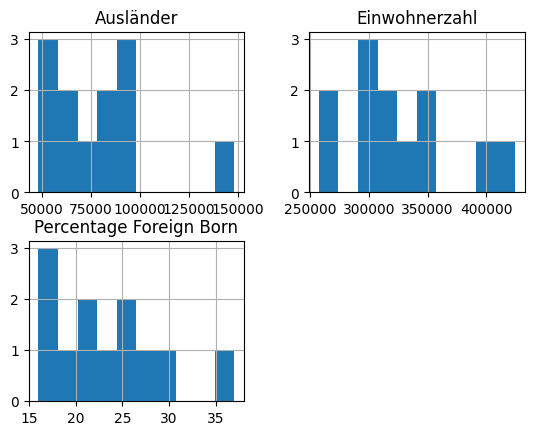

In [18]:
merged_berpop.hist()

<Axes: >

[]

[]

Text(0.5, 274.24344253431104, 'https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/')

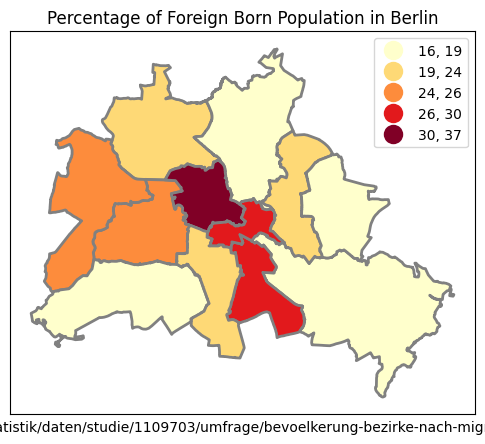

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
berfb_map2.plot(ax=ax,column='Percentage Foreign Born',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Percentage of Foreign Born Population in Berlin")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/''')

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
berfb_map2.plot(ax=ax,column='Percentage Foreign Born',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Percentage of Foreign Born Population in Berlin")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/''')

#Housing Projects Berlin

In [ ]:
housing_projects=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/Hausprojekte_Berlin.xlsx')

In [ ]:
housing_projects.head(25)

,Housing Project,Address
0,Bödi 9,Bödikerstr. 9 10245 Berlin
1,Chuzpe Plietsch,Karl-Marx-Str. 282 12057 Berlin
2,Grüni,Gruenberger Str. 73 10245 Berlin
3,H48,"Hermannstraße 38, 12049 Berlin"
4,Hausprojekt Burge,"Burgemeisterstraße 17, 12099 Berlin, Deutschland"
5,Hausprojekt M29,Malmöer Str. 29 10439 Berlin
6,Hausprojekt Rahnsdorf,Püttbergeweg 77 12589 Berlin
7,Jagow 15,Jagowstr. 15 13585 Berlin
8,Jetty,Röbellweg 14 13125 Berlin
9,Kastanie,Kastanienallee 85 10435 Berlin


In [ ]:
from geopandas.tools import geocode

In [ ]:
locations = geocode(housing_projects['Address'], provider='nominatim', user_agent='myName',timeout=2)
locations.head(5)

,geometry,address
0,POINT (13.46374 52.49999),"9, Bödikerstraße, Rudolfkiez, Friedrichshain, ..."
1,POINT (13.44374 52.46384),"282, Karl-Marx-Straße, Neukölln, Berlin, 12057..."
2,POINT (13.45953 52.51145),"Stadtteilladen Zielona Góra, 73, Grünberger St..."
3,POINT (13.42883 52.47206),"Hermannstraße, Rollbergsiedlung, Neukölln, Ber..."
4,POINT (13.37973 52.4575),"17, Burgemeisterstraße, Tempelhof, Tempelhof-S..."


<Axes: >

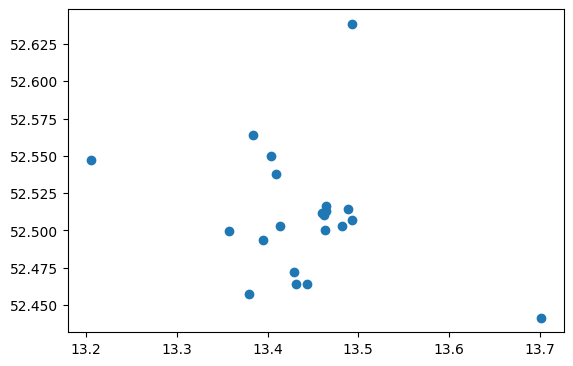

In [ ]:
locations.plot()

<Axes: >

[]

[]

Text(0.5, 23.52222222222222, 'https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/')

<Axes: title={'center': 'Percentage of Foreign Born Population in Berlin'}, xlabel='https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/'>

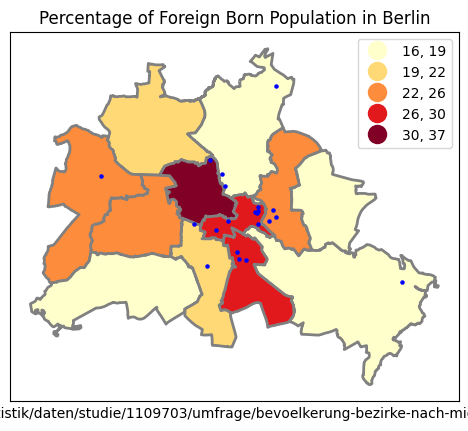

In [ ]:
#line 1 and two adapted from chatGPT suggestion on how to make two maps I am overlaying the same size
if berfb_map2.crs != locations.crs:
    berhp = locations.to_crs(berfb_map2.crs)

fig, ax = plt.subplots()
berfb_map2.plot(ax=ax,column='Percentage Foreign Born',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Percentage of Foreign Born Population in Berlin")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/''')
berhp.plot(ax=ax, color='blue', markersize=5)

In [20]:
#data from https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021
airbnb_ber=pd.read_csv('https://raw.githubusercontent.com/hbeck118/GIS/main/airbnb_berlin.csv')

In [25]:
airbnb_ber.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,cor
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28,60,18,2018-11-11,0.21,3,101,"52.54433,13.39761"
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74,90,141,2020-04-03,2.20,6,357,"52.53305,13.40394"
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.14,1,254,"52.53471,13.4181"
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,7,27,2018-08-16,0.28,1,285,"52.49884,13.3494"


In [24]:
airbnb_ber['cor']=airbnb_ber['latitude'].astype(str) + ',' + airbnb_ber['longitude'].astype(str)

In [29]:
from geopandas.tools import geocode
import geocoder
import os

In [32]:
#insert google API key
airbnb_geo = geocoder.google(airbnb_ber['cor'])
#airbnb_geo = geocode(airbnb_ber['cor'], provider='nominatim', user_agent='hb')
#geo.head(2)

ERROR:geocoder.base:Status code 413 from https://maps.googleapis.com/maps/api/geocode/json: ERROR - 413 Client Error: Request Entity Too Large for url: https://maps.googleapis.com/maps/api/geocode/json?address=52.54433%2C13.39761&address=52.53305%2C13.40394&address=52.53471%2C13.4181&address=52.49884%2C13.3494&address=52.51163%2C13.45289&address=52.54301%2C13.41534&address=52.53269%2C13.41805&address=52.54813%2C13.40366&address=52.50312%2C13.43508&address=52.49419%2C13.42166&address=52.53711%2C13.40888&address=52.5046%2C13.43374&address=52.53408%2C13.38871&address=52.53355%2C13.40476&address=52.49134%2C13.37975&address=52.52931%2C13.41999&address=52.54419%2C13.41956&address=52.54804%2C13.40349&address=52.54367%2C13.42431&address=52.54596%2C13.42291&address=52.52195%2C13.3559&address=52.5349%2C13.39857&address=52.51849%2C13.30257&address=52.49376%2C13.36408&address=52.50906%2C13.39374&address=52.4987%2C13.44041&address=52.53713%2C13.42473&address=52.48968%2C13.41993&address=52.5378%2C13